In [167]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

In [130]:
train_df = pd.read_csv('datasets/spaceship/temp/final.csv')
answers = train_df['Transported']
train_df = train_df.drop(columns=['Transported', 'Unnamed: 0', 'RoomService', 'Spa', 'VRDeck', 'Destination'])
train_df

,HomePlanet,CryoSleep,Age,VIP,FoodCourt,ShoppingMall,Cab1,Cab2,Cab3
0,1.0,0.0,39.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,24.0,0.0,9.0,25.0,5.0,0.0,1.0
2,1.0,0.0,58.0,1.0,3576.0,0.0,0.0,0.0,1.0
3,1.0,0.0,33.0,0.0,1283.0,371.0,0.0,0.0,1.0
4,0.0,0.0,16.0,0.0,70.0,151.0,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,41.0,1.0,6819.0,0.0,8.0,1817.0,2.0
8689,0.0,1.0,18.0,0.0,0.0,0.0,8.0,1817.0,2.0
8690,0.0,0.0,26.0,0.0,0.0,1872.0,8.0,1817.0,2.0
8691,1.0,0.0,32.0,0.0,1049.0,0.0,8.0,1817.0,2.0


### Splitting training data for higher performance accuracy

In [148]:
X_train, X_test, y_train, y_test = train_test_split(train_df, answers, test_size=0.3, random_state=42)

## DecisionTreeClassifier

CV accuracy: 0.6880854560394413
Correlation: -0.04958636088092597
Accuracy: 70.054%
Tree Depth: 30


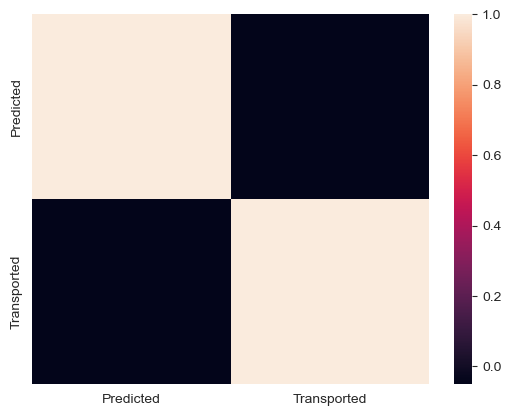

In [169]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=17)
print("CV accuracy:", np.mean(cross_val_score(clf_tree, X_train, y_train, cv = 5)))
clf_tree.fit(X_train, y_train)

predicted = pd.DataFrame(clf_tree.predict(X_test))

# Preparing predicted values
predicted.columns=['Predicted']

# Creating new DataFrame
new_df = predicted.join(y_test)

sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
print(f"Accuracy: {round(clf_tree.score(X_test, y_test), 5) * 100}%")
print(f"Tree Depth: {clf_tree.get_depth()}")

## Training kNN algorithm

CV accuracy: 0.6131470829909613
Correlation: -0.03558183286088788
Accuracy: 70.054%
Tree Depth: 30


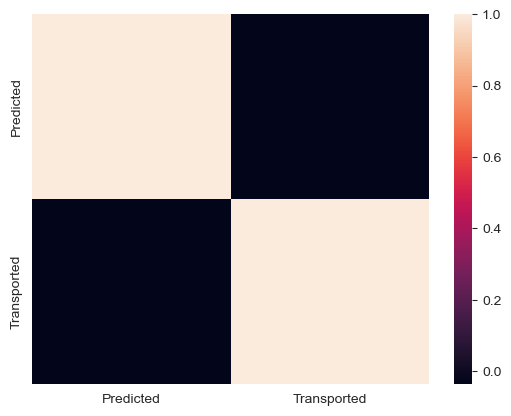

In [172]:
neigh = KNeighborsClassifier(n_neighbors=9)
print("CV accuracy:", np.mean(cross_val_score(neigh, X_train, y_train, cv = 5)))
neigh.fit(X_train, y_train)

predicted = pd.DataFrame(neigh.predict(X_test))

# Preparing predicted values
predicted.columns=['Predicted']

# Creating new DataFrame
new_df = predicted.join(y_test)

sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
print(f"Accuracy: {round(clf_tree.score(X_test, y_test), 5) * 100}%")
print(f"Tree Depth: {clf_tree.get_depth()}")

## Training GradientBoostingClassifier

CV accuracy: 0.7252259654889072
Correlation: -0.03887079021778054
Accuracy: 70.054%
Tree Depth: 30


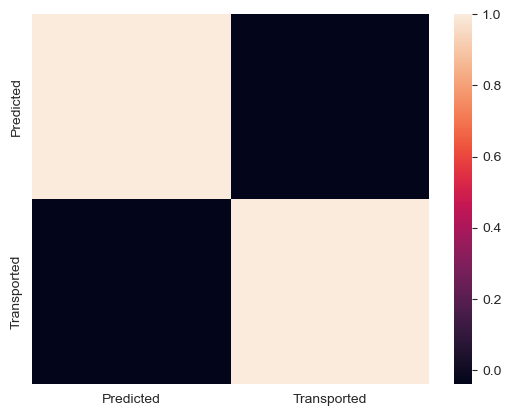

In [176]:
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5,
                                 max_depth=15, random_state=17)
print("CV accuracy:", np.mean(cross_val_score(clf, X_train, y_train, cv = 5)))
clf.fit(X_train, y_train)

predicted = pd.DataFrame(clf.predict(X_test))

# Preparing predicted values
predicted.columns=['Predicted']

# Creating new DataFrame
new_df = predicted.join(y_test)

sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
print(f"Accuracy: {round(clf_tree.score(X_test, y_test), 5) * 100}%")
print(f"Tree Depth: {clf_tree.get_depth()}")

## Trying different model on test DataSet

In [143]:
test_df = pd.read_csv('datasets/spaceship/temp/final_test.csv')
temp_df = pd.read_csv('datasets/spaceship/temp/test_cabin.csv')
test_df_ids = temp_df['PassengerId']
test_df = test_df.drop(columns=['Unnamed: 0'])
test_df

,HomePlanet,CryoSleep,Age,VIP,FoodCourt,ShoppingMall,Cab1,Cab2,Cab3
0,0.0,1.0,27.000000,0.0,0.0,0.0,6.0,3.0,1.0
1,0.0,0.0,19.000000,0.0,9.0,0.0,5.0,4.0,1.0
2,1.0,1.0,31.000000,0.0,0.0,0.0,2.0,0.0,1.0
3,1.0,0.0,38.000000,0.0,6652.0,0.0,2.0,1.0,1.0
4,0.0,0.0,20.000000,0.0,0.0,635.0,5.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...
4272,0.0,1.0,34.000000,0.0,0.0,0.0,6.0,1303.0,1.0
4273,0.0,0.0,42.000000,0.0,847.0,17.0,3.0,296.0,0.0
4274,2.0,1.0,28.658146,0.0,0.0,0.0,3.0,296.0,0.0
4275,1.0,0.0,28.658146,0.0,2680.0,0.0,3.0,297.0,0.0


In [144]:
ans1 = pd.DataFrame(clf_tree.predict(test_df))
ans1.columns=['Transported']
ans1 = ans1['Transported'].map({1: True, 0: False})
ans1 = pd.DataFrame(test_df_ids).join(ans1)
ans1 = ans1.set_index("PassengerId")
ans1.to_csv(path_or_buf='datasets/spaceship/answers/clf_tree.csv')

In [145]:
ans2 = pd.DataFrame(clf.predict(test_df))
ans2.columns=['Transported']
ans2 = ans2['Transported'].map({1: True, 0: False})
ans2 = pd.DataFrame(test_df_ids).join(ans2)
ans2 = ans2.set_index("PassengerId")
ans2.to_csv(path_or_buf='datasets/spaceship/answers/gradient_boosting.csv')